In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. READING AND UNDERSTANDING THE DATA

In [3]:
bike_rental = pd.read_csv('../input/bike-sharing/day.csv')
bike_rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Shape of the dataset
bike_rental.shape

(730, 16)

In [5]:
bike_rental.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


There is no need of the following columns:
1. instant: as this is just the index values of the entries/records
2. atemp: it is directly correlated with temp. So we can use any among them. We will use temp
3. dteday: We already have 'weekday' variable. No need to have dteday in date format seperately.
3. The 'cnt' variable is just the addition of two variables 'causal' and 'reistered'. So we can drop 'casual' and 'registered' variables as well. 

In [8]:
bike_rental.drop(['instant','dteday','casual','registered','atemp'], axis = 1, inplace=True)

# 2. VISUALISING THE DATA

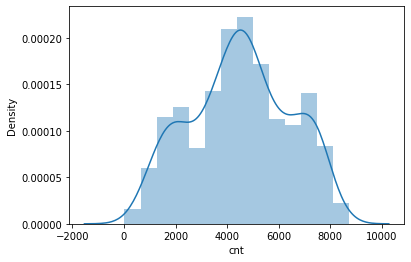

In [9]:
# Distribution of bike counts
sns.distplot(bike_rental.cnt)
plt.show()

In [10]:
bike_rental.cnt.describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

The average count of bike rentals is 4508, minimum is 22 and maximum is 8714

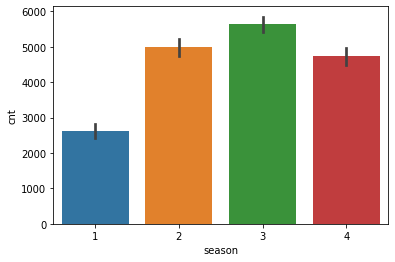

In [11]:
# Season-wise analysis on bike counts
sns.barplot(bike_rental['season'],bike_rental['cnt'])
plt.show()

#1 -> Spring
#2 -> Summer
#3 -> Fall
#4 -> Winter

It can be observed that more bike were rented during the fall, while people prefered bikes less during spring season

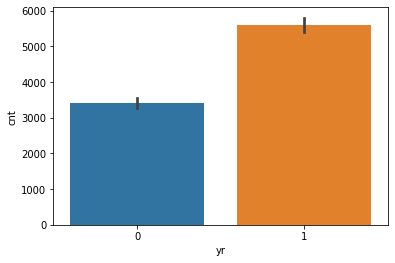

In [12]:
# year-wise analysis on bike conut
sns.barplot(bike_rental['yr'],bike_rental['cnt'])
plt.show()

#0 - 2018
#1 - 2019

2019 saw an increase in bike rentals

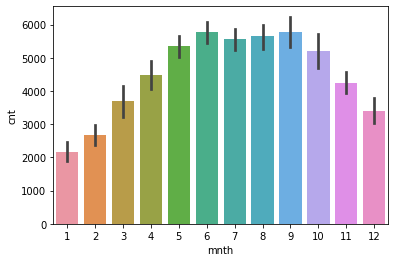

In [13]:
# Month-wise analysis of bike counts
sns.barplot(bike_rental['mnth'],bike_rental['cnt'])
plt.show()

This re-establishes the previous observation that most of the rentals were during the Fall i.e.  in the  months of Aug, Sept and Oct

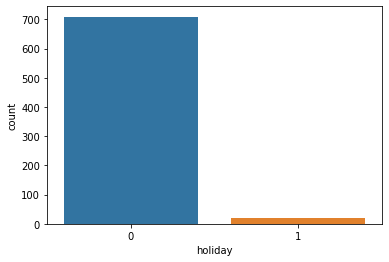

In [14]:
# holiday analysis
sns.countplot(bike_rental['holiday'])
plt.show()

If day is neither weekend nor holiday is 1, otherwise is 0

In [15]:
bike_rental.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

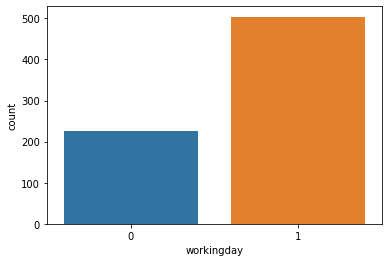

In [16]:
# Count of Bike rentals on working day
sns.countplot(bike_rental.workingday)
plt.show()

More Rentals happend on working day

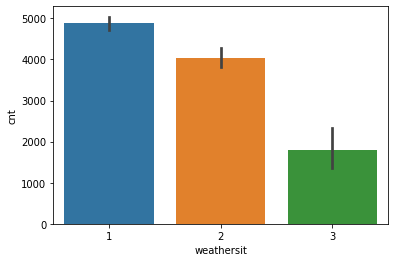

In [17]:
# Distribution of bike rentals on different weather conditions
sns.barplot(bike_rental.weathersit,bike_rental.cnt)
plt.show()

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

It shows that most people prefers bike during Clear weather having very few cloud cover

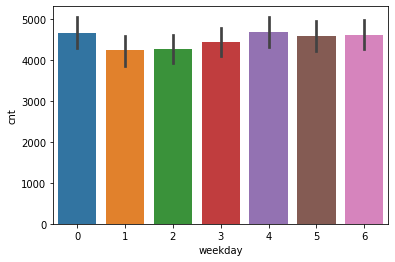

In [18]:
# Count of bike rentals on different days of the week
sns.barplot(bike_rental.weekday,bike_rental.cnt)
plt.show()

The count of bike rentals during all weekdays remain uniform in general

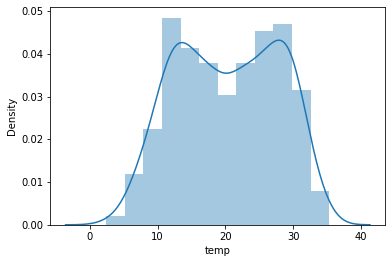

In [19]:
# Distribuiton of temp
sns.distplot(bike_rental.temp)
plt.show()

In [20]:
bike_rental.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

The temperature in general is between 15 to 35 degree Celsius, with a downward curve along the 20 degrees

Max Temp: 35.32

Min Temp: 2.42

Mean Temp: 20.31

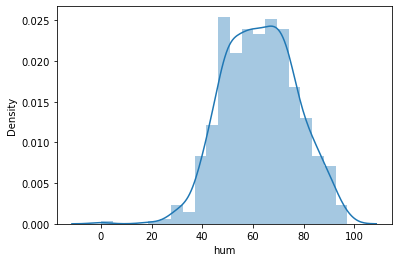

In [21]:
# Distribution of humidity
sns.distplot(bike_rental.hum)
plt.show()

Humidity is more prevalent in the range of 40-80%

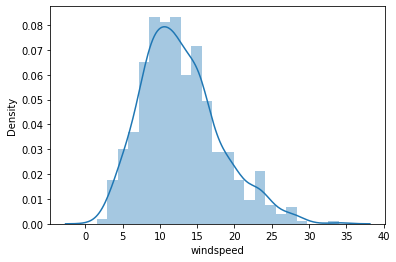

In [22]:
# Distribution of wind speed
sns.distplot(bike_rental.windspeed)
plt.show()

In [23]:
# Dropping the categorical values (values with categorical nature)
bike_rental_visual = bike_rental.drop(['season','yr','mnth','holiday','weekday','workingday','weathersit'],axis=1)

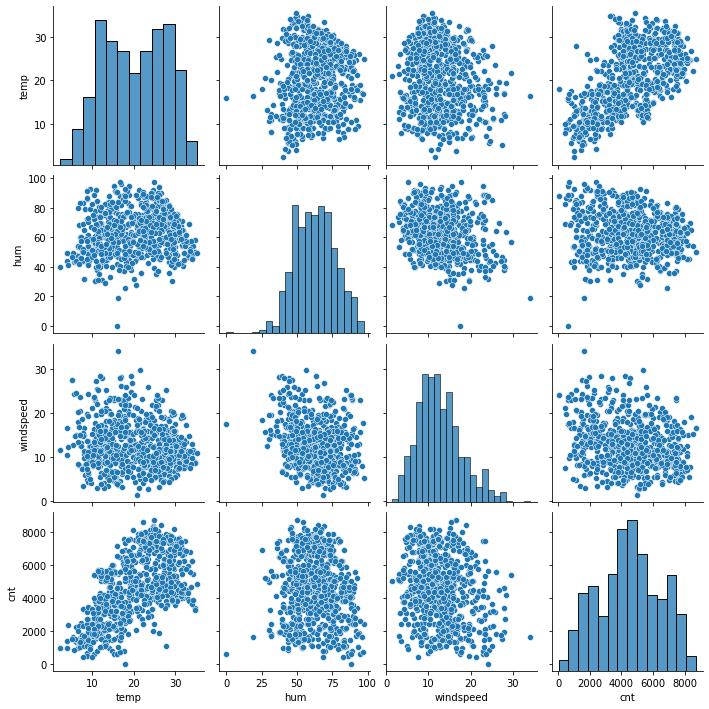

In [24]:
# Numerical data
sns.pairplot(bike_rental_visual)
plt.show()

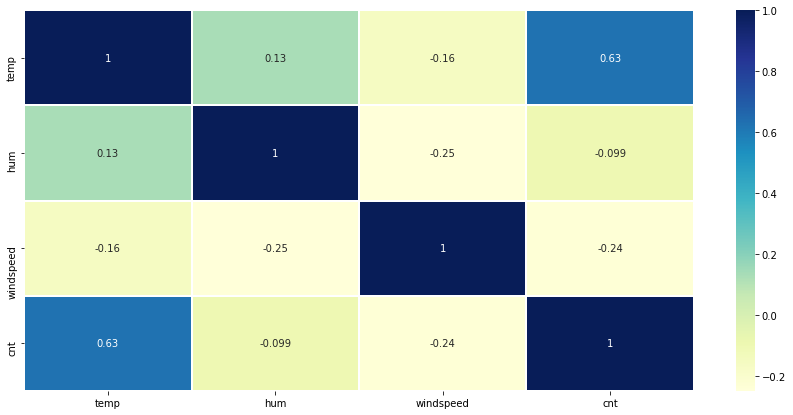

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(bike_rental_visual.corr(),annot=True,cmap="YlGnBu",linewidth=0.01)
plt.show()

Strong positive correlation is observed between cnt and registered (0.95). Also between cnt and casual (0.67)

There is a positive correlation between cnt and temp (0.63)

There exist a negative correlation for cnt with hum and windspeed (-0.099 and -0.24 respectively)

In [26]:
# Identifying categorical variables
categorical_variables = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [27]:
# converting dtype to categorical variables
bike_rental[categorical_variables] = bike_rental[categorical_variables].astype('category')

In [28]:
bike_rental.describe(include=['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,0,1,0,1,1,1
freq,188,365,62,709,105,504,463


# 3. Data Preparation

In [29]:
# Creating dummy variables
dummy_vars = pd.get_dummies(bike_rental[['season','weekday','mnth','weathersit']],drop_first=True)

In [30]:
# Concat dummy variables with original dataset
bike_rental = pd.concat([bike_rental,dummy_vars],axis=1)

In [31]:
bike_rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# drop categorical columns
bike_rental.drop(['season','weekday','mnth','weathersit'],axis=1, inplace=True)

In [33]:
bike_rental.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
bike_rental.shape

(730, 29)

In [35]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   yr            730 non-null    category
 1   holiday       730 non-null    category
 2   workingday    730 non-null    category
 3   temp          730 non-null    float64 
 4   hum           730 non-null    float64 
 5   windspeed     730 non-null    float64 
 6   cnt           730 non-null    int64   
 7   season_2      730 non-null    uint8   
 8   season_3      730 non-null    uint8   
 9   season_4      730 non-null    uint8   
 10  weekday_1     730 non-null    uint8   
 11  weekday_2     730 non-null    uint8   
 12  weekday_3     730 non-null    uint8   
 13  weekday_4     730 non-null    uint8   
 14  weekday_5     730 non-null    uint8   
 15  weekday_6     730 non-null    uint8   
 16  mnth_2        730 non-null    uint8   
 17  mnth_3        730 non-null    uint8   
 18  mnth_4    

In [36]:
# Converting categorical variables into numeric for modeling
bike_rental[['yr','holiday','workingday']] = bike_rental[['yr','holiday','workingday']].astype('uint8')
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    uint8  
 1   holiday       730 non-null    uint8  
 2   workingday    730 non-null    uint8  
 3   temp          730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  weekday_1     730 non-null    uint8  
 11  weekday_2     730 non-null    uint8  
 12  weekday_3     730 non-null    uint8  
 13  weekday_4     730 non-null    uint8  
 14  weekday_5     730 non-null    uint8  
 15  weekday_6     730 non-null    uint8  
 16  mnth_2        730 non-null    uint8  
 17  mnth_3        730 non-null    uint8  
 18  mnth_4        730 non-null    

### Spilting the dataset into train and test sets

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
np.random.seed(0)
bike_rental_train, bike_rental_test = train_test_split(bike_rental, train_size=0.7, random_state = 42)

In [39]:
print(bike_rental_train.shape)
print(bike_rental_test.shape)

(510, 29)
(220, 29)


### Scaling of dataset

As we know that there are values of different range in the dataset. To make them more uniform it is important tot scale the data.

Min-Max scaling is used to scale both the training and testing dataset, as it can also take care of the outliers

### Training data scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
num_var = ['temp','hum','windspeed','cnt']

In [42]:
scaler = MinMaxScaler()

bike_rental_train[num_var] = scaler.fit_transform(bike_rental_train[num_var])
bike_rental_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
645,1,1,0,0.403972,0.731215,0.419004,0.609320,0,0,1,...,0,0,0,0,0,1,0,0,1,0
163,0,0,1,0.717562,0.509660,0.708724,0.554026,1,0,0,...,0,1,0,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.785745,0.415925,0.088253,0,0,0,...,0,0,0,0,0,0,0,1,1,0
640,1,0,1,0.745598,0.817947,0.110593,0.862127,0,0,1,...,0,0,0,0,0,1,0,0,1,0
625,1,0,1,0.703024,0.899098,0.839562,0.439696,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### Testing data scaling

In [43]:
bike_rental_test[num_var] = scaler.transform(bike_rental_test[num_var])
bike_rental_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
468,1,0,0,0.543115,0.518248,0.422104,0.848606,1,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,1,0.758058,0.843709,0.479765,0.526017,1,0,0,...,1,0,0,0,0,0,0,0,0,0
302,0,0,1,0.324018,0.642765,0.386287,0.350115,0,0,1,...,0,0,0,0,0,1,0,0,0,0
355,0,0,0,0.453814,0.780592,0.062325,0.318363,0,0,0,...,0,0,0,0,0,0,0,1,1,0
515,1,0,1,0.773634,0.507943,0.433030,0.833877,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [44]:
# X and y for training set
y_train = bike_rental_train.pop('cnt')
X_train = bike_rental_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,weekday_1,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
645,1,1,0,0.403972,0.731215,0.419004,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
163,0,0,1,0.717562,0.509660,0.708724,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.785745,0.415925,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
640,1,0,1,0.745598,0.817947,0.110593,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
625,1,0,1,0.703024,0.899098,0.839562,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [45]:
# X and y for testing set
y_test = bike_rental_test.pop('cnt')
X_test = bike_rental_test
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,weekday_1,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
468,1,0,0,0.543115,0.518248,0.422104,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,1,0.758058,0.843709,0.479765,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
302,0,0,1,0.324018,0.642765,0.386287,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
355,0,0,0,0.453814,0.780592,0.062325,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
515,1,0,1,0.773634,0.507943,0.433030,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# 4. Modeling and Evaluation

### 4.1 Recursive feature elemination (RFE)


RFE is basically selecting the most effective features in a training dataset that are more relevant in predicting the target variable.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [47]:
import statsmodels.api as sm

In [48]:
# Creating object
lm = LinearRegression()

# Fit model
lm.fit(X_train,y_train)

# RFE
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

# Selecting columns
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_7', 'mnth_9', 'mnth_10', 'mnth_11',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

### 4.2 Model building using statsmodel

In [49]:
# X_train_rfe with RFE selected variables
X_train_rfe = X_train[cols]

In [50]:
# function for stats linear model
def sm_linearmodel (X_train_sm_var):
    # adding constant
    X_train_sm_var = sm.add_constant(X_train_sm_var)
    
    # create a fitted model
    lm = sm.OLS(y_train,X_train_sm_var).fit()
    
    return lm

In [51]:
# VIF
def cal_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

In [52]:
lm_first = sm_linearmodel(X_train_rfe)
print(lm_first.summary())

print(cal_vif(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.4
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.04e-185
Time:                        07:02:23   Log-Likelihood:                 485.00
No. Observations:                 510   AIC:                            -938.0
Df Residuals:                     494   BIC:                            -870.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1761      0.031      5.656   

In [53]:
# removing variables with high p values i.e. > 0.05
pvalue = lm_first.pvalues
while(max(pvalue)>0.05):
    p_var = pvalue[pvalue == pvalue.max()].index
    print('Removed variable:',p_var[0],'P value:',round(max(pvalue),3))
    
    # dropping vars with high p value
    X_train_rfe = X_train_rfe.drop(p_var,axis=1)
    lm_first = sm_linearmodel(X_train_rfe)
    pvalue = lm_first.pvalues

Removed variable: mnth_11 P value: 0.415


mnth_11(Nov) had the higher value than 0.05 and hence the var is dropped.

In [54]:
# summary
print(lm_first.summary())

# VIF
print(cal_vif(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.8
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.04e-186
Time:                        07:02:23   Log-Likelihood:                 484.66
No. Observations:                 510   AIC:                            -939.3
Df Residuals:                     495   BIC:                            -875.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1755      0.031      5.640   

Variables with p values > 0.05 has been taken care of.
R2: 0.840 and R2-adjusted: 0.836

We will now analyze the varibales based on the VIF values.
The variables having high VIF(>5) are:
1. temp: 24.83
2. hum: 15.48
3. season_3: 7.67

However, while performing EDA we observed that temp has high correlation with cnt. Hence it becomes a very significant variable and cannot be dropped.
We thus proceed with dropping of two variables i.e. hum and season_3 one by one
    

In [55]:
# dropping hum and season_3
X_train_new = X_train_rfe.drop(['hum'],axis=1)

In [56]:
# summary
lm_second = sm_linearmodel(X_train_new)
print(lm_second.summary())

# VIF
print(cal_vif(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.0
Date:                Sun, 09 May 2021   Prob (F-statistic):          5.66e-184
Time:                        07:02:24   Log-Likelihood:                 475.40
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     496   BIC:                            -863.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0708      0.020      3.620   

After dropping hum variable we can observe the following changes:
1. A very slight change in R2 and R2-adjusted
2. p-value of mnth_7 is 0.094 (which is > 0.05)

Also there is high VIF for season_3 (7.43)
Thus we need take care of both i.e. high p value (mnth_7) and high VIF (season_3)

In [57]:
X_train_new = X_train_new.drop(['mnth_7','season_3'],axis=1)

lm_third = sm_linearmodel(X_train_new)
print(lm_third.summary())

print(cal_vif(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.5
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.11e-180
Time:                        07:02:24   Log-Likelihood:                 460.68
No. Observations:                 510   AIC:                            -897.4
Df Residuals:                     498   BIC:                            -846.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0523      0.020      2.678   

- All the variables have p-value less than 0.05 and close to zero.
- All features have VIF less than 5.
- R2: 0.824 and R2_adj:0.820

### Final model

In [58]:
final_model = lm_third
final_params = list(final_model.params.index)
final_params.remove('const')
print(final_params)
print(round(final_model.params,3))

['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3']
const           0.052
yr              0.239
holiday        -0.090
temp            0.588
windspeed      -0.096
season_2        0.099
season_4        0.132
mnth_3          0.041
mnth_9          0.111
mnth_10         0.063
weathersit_2   -0.085
weathersit_3   -0.268
dtype: float64


### Model Evaluation on train set

In [59]:
# residual analysis
X_train_residuals = X_train[final_params]

In [60]:
X_train_residuals = sm.add_constant(X_train_residuals)

# prdict train set
y_train_pred = final_model.predict(X_train_residuals)

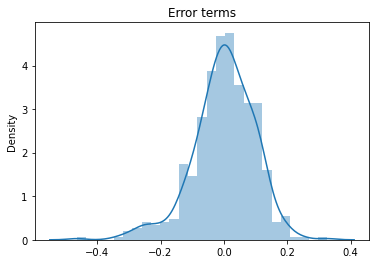

In [61]:
residual = y_train - y_train_pred
sns.distplot(residual)
plt.title("Error terms")
plt.show()

It shows normal distribution with mean at zero

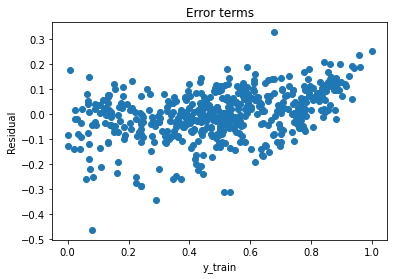

In [64]:
plt.scatter(y_train,residual)
plt.title('Error terms')
plt.xlabel('y_train')
plt.ylabel('Residual')
plt.show()

- The plot is reasonably random.
- Also shows resaonsably constant variance (homoscedasticity)

### Prediction on test set

In [65]:
X_test_sm = X_test[final_params]
X_test_sm = sm.add_constant(X_test_sm)


In [67]:
y_test_pred = final_model.predict(X_test_sm)

### Evaluation of the model on test set

In [70]:
r2 = r2_score(y_true = y_test,y_pred = y_test_pred)
print('R2 for test data:',round(r2,3))

R2 for test data: 0.816


In [71]:
# Mean squared error
mse= mean_squared_error(y_test,y_test_pred)
print('Mean squared error:',round(mse,4))

Mean squared error: 0.0099


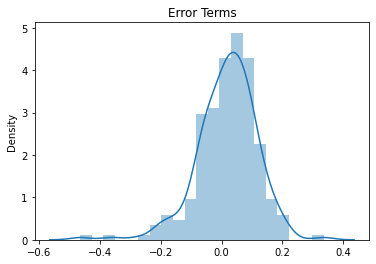

In [72]:
# Error terms
res_test = y_test - y_test_pred
plt.title("Error Terms")
sns.distplot(res_test)
plt.show()

Text(0, 0.5, 'Residual')

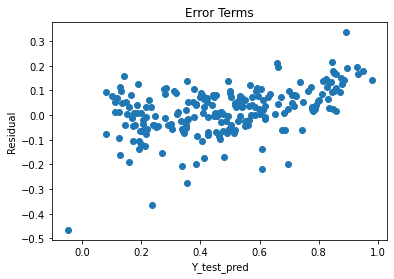

In [73]:
plt.scatter(y_test,res_test)
plt.title('Error Terms')
plt.xlabel('Y_test_pred')
plt.ylabel('Residual')

The plot is reasonably random

Text(0, 0.5, 'y_test_pred')

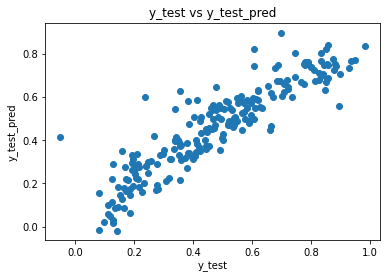

In [74]:
# y_test vs y_test_pred
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

The plot shows a liner relationship, hence its a good model.

### Best Fit line

cnt = 0.052 + (0.239 X yr) - (0.090 X holiday) + (0.588 X temp) - (0.096 X windspeed) + (0.099 X season_2) + (0.132 X season_4) + (0.041 X mnth_3) + (0.111 X mnth_9) + (0.063 X mnth_10) - (weathersit_2 X 0.085) - (0.268 X weathersit_3)